In [1]:
# Importation des bibliothèques nécessaires:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection
plt.style.use('ggplot')

import plotly.express as px

import seaborn as sns

from scipy import stats
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

sns.set()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("Dark2")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import de données du notebook 1:
# on_bad_lines='skip'
terra = pd.read_csv('dfcnewakx.csv', sep='\t', low_memory=False)
terra.head()

code      countries_fr                product_name  \
0  3257980112590            France                    Boudoirs   
1  3045140118502  France,Allemagne          Noisettes Entières   
2  7613031264285           Pologne       SMACZNA ZUPA Grochova   
3  3262720380092            France  Jus d'orange des tropiques   
4  3262720380054            France             Nectar Tropical   

           brands nutrition_grade_fr       pnns_groups_2  pnns_groups_1  \
0            Cora                  d  biscuits and cakes  sugary snacks   
1           Milka                  e  chocolate products  sugary snacks   
2  WINIARY,Nestlé                  c             unknown        unknown   
3           Royal                  c        fruit juices      beverages   
4           Royal                  e       fruit nectars      beverages   

                                       categories_fr  energy_100g  \
0  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...       1637.0   
1  Snacks sucrés,Chocolats,Chocolats au lait,Choc...       2320.0   
2                             pl:Soupes-deshydratees        159.0   
3  Aliments et boissons à base de végétaux,Boisso...        184.0   
4  Aliments et boissons à base de végétaux,Boisso...        201.0   

   proteins_100g  ...  sodium_100g  sugars_100g  fat_100g  carbohydrates_100g  \
0            7.6  ...     0.150000         55.3       3.2                81.0   
1            8.1  ...     0.137795         47.0      35.5                48.5   
2            1.8  ...     0.400000          0.4       0.8                 5.5   
3            0.6  ...     0.002000          9.2       0.1                10.5   
4            0.3  ...     0.003000         10.5       0.1                12.4   

   saturated-fat_100g  nutrition-score-fr_100g  fiber_100g  calcium_100g  \
0                0.90                     13.0         1.5      4.012667   
1               15.00                     23.0         3.3      4.012667   
2                0.30                      3.0         0.7      4.012667   
3                0.05                      4.0         0.5      4.012667   
4                0.02                     14.0         0.5      3.986000   

   countries_cleaned countries_cleaned_cat  
0                 FR                    FR  
1                 FR                    FR  
2                 PO                    PO  
3                 FR                    FR  
4                 FR                    FR  

[5 rows x 21 columns]

In [3]:
terra.isna().sum()

code                       0
countries_fr               0
product_name               0
brands                     0
nutrition_grade_fr         0
pnns_groups_2              0
pnns_groups_1              0
categories_fr              0
energy_100g                0
proteins_100g              0
salt_100g                  0
sodium_100g                0
sugars_100g                0
fat_100g                   0
carbohydrates_100g         0
saturated-fat_100g         0
nutrition-score-fr_100g    0
fiber_100g                 0
calcium_100g               0
countries_cleaned          0
countries_cleaned_cat      0
dtype: int64

In [4]:
# définition d'une fonction -tvm- pour établir le tx de valeurs manquantes:
def tvm(df):
    return round(df.isnull().sum().sum()/(df.size)*100, 2)

In [5]:
tvm(terra)

0.0

In [6]:
terra

code      countries_fr  \
0      3257980112590            France   
1      3045140118502  France,Allemagne   
2      7613031264285           Pologne   
3      3262720380092            France   
4      3262720380054            France   
...              ...               ...   
74629  8007141504376            France   
74630       20437336            France   
74631  3297760098379            France   
74632       24672481          Slovénie   
74633  3017760038409     France,Suisse   

                                            product_name            brands  \
0                                               Boudoirs              Cora   
1                                     Noisettes Entières             Milka   
2                                  SMACZNA ZUPA Grochova    WINIARY,Nestlé   
3                             Jus d'orange des tropiques             Royal   
4                                        Nectar Tropical             Royal   
...                                                  ...               ...   
74629               Rovagnati Prosciutto Cotto Snello GR            Snello   
74630                                      Dessert Mango            Deluxe   
74631  Spécialité de pommes abricots Bergeron sans su...  Charles Et Alice   
74632                     Pudding z okusom gozdni sadeži             Bella   
74633                         Lulu la barquette (Fraise)                LU   

      nutrition_grade_fr       pnns_groups_2  pnns_groups_1  \
0                      d  biscuits and cakes  sugary snacks   
1                      e  chocolate products  sugary snacks   
2                      c             unknown        unknown   
3                      c        fruit juices      beverages   
4                      e       fruit nectars      beverages   
...                  ...                 ...            ...   
74629                  c             unknown        unknown   
74630                  d             unknown        unknown   
74631                  b             unknown        unknown   
74632                  b             unknown        unknown   
74633                  d  biscuits and cakes  sugary snacks   

                                           categories_fr  energy_100g  \
0      Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...       1637.0   
1      Snacks sucrés,Chocolats,Chocolats au lait,Choc...       2320.0   
2                                 pl:Soupes-deshydratees        159.0   
3      Aliments et boissons à base de végétaux,Boisso...        184.0   
4      Aliments et boissons à base de végétaux,Boisso...        201.0   
...                                                  ...          ...   
74629                                            unknown        448.0   
74630                                            unknown       1109.0   
74631                                            unknown        243.0   
74632                                  Desserts,Puddings        387.0   
74633  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...       1480.0   

       proteins_100g  ...  sodium_100g  sugars_100g  fat_100g  \
0                7.6  ...     0.150000         55.3       3.2   
1                8.1  ...     0.137795         47.0      35.5   
2                1.8  ...     0.400000          0.4       0.8   
3                0.6  ...     0.002000          9.2       0.1   
4                0.3  ...     0.003000         10.5       0.1   
...              ...  ...          ...          ...       ...   
74629           18.0  ...     0.669291          1.5       3.0   
74630            2.3  ...     0.066929         20.0      15.0   
74631            0.5  ...     0.000000         11.0       0.5   
74632            3.0  ...     0.059055         11.1       1.4   
74633            4.2  ...     0.031496         60.0       2.1   

       carbohydrates_100g  saturated-fat_100g  nutrition-score-fr_100g  \
0                    81.0                0.90                     13.0   
1          

In [7]:
terra.dtypes

code                        object
countries_fr                object
product_name                object
brands                      object
nutrition_grade_fr          object
pnns_groups_2               object
pnns_groups_1               object
categories_fr               object
energy_100g                float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
sugars_100g                float64
fat_100g                   float64
carbohydrates_100g         float64
saturated-fat_100g         float64
nutrition-score-fr_100g    float64
fiber_100g                 float64
calcium_100g               float64
countries_cleaned           object
countries_cleaned_cat       object
dtype: object

In [8]:
terra.columns

Index(['code', 'countries_fr', 'product_name', 'brands', 'nutrition_grade_fr',
       'pnns_groups_2', 'pnns_groups_1', 'categories_fr', 'energy_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'fat_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g',
       'fiber_100g', 'calcium_100g', 'countries_cleaned',
       'countries_cleaned_cat'],
      dtype='object')

In [9]:
# mes variables - essentiellement quantitatives:
vqnt = ['energy_100g','proteins_100g','salt_100g','sodium_100g','sugars_100g','fat_100g',
       'carbohydrates_100g','saturated-fat_100g','nutrition-score-fr_100g','fiber_100g','calcium_100g']

In [10]:
# autres variables:
var = ['code', 'countries_fr', 'product_name', 'brands', 'nutrition_grade_fr',
       'pnns_groups_2', 'pnns_groups_1', 'categories_fr', 'energy_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'fat_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g',
       'fiber_100g', 'calcium_100g', 'countries_cleaned',
       'countries_cleaned_cat']

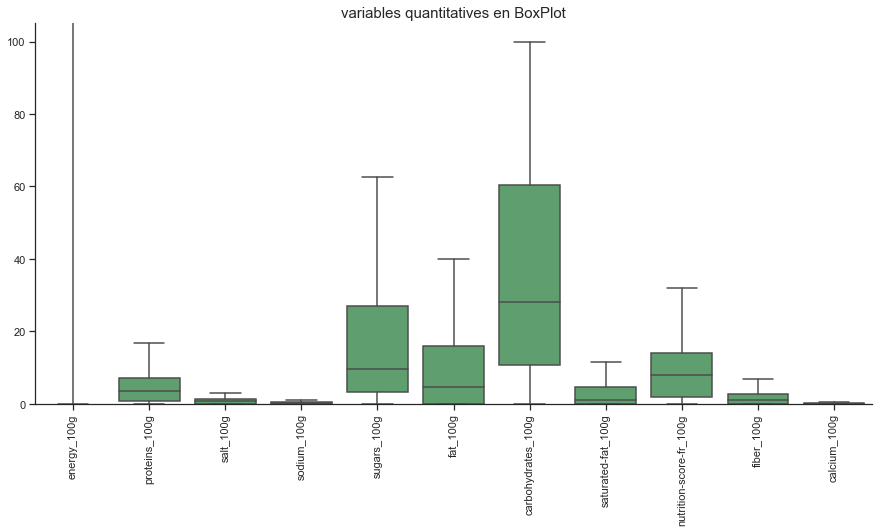

In [11]:
# https://stackoverflow.com/questions/73073876/how-can-i-show-the-box-plot-of-only-certain-columns
# https://www.statology.org/seaborn-boxplot-remove-outliers/
# https://builtin.com/data-science/boxplot
# boxplot de variables quantitatives:
degrees = 90

plt.figure(figsize=(15,7))

ax=plt.axes()
plt.xticks(rotation = degrees)
ax.set_ylim([0,1.05e2])
sns.boxplot(data=terra[vqnt], color='g', showfliers=False).set_title("variables quantitatives en BoxPlot", fontsize=15)

plt.show()

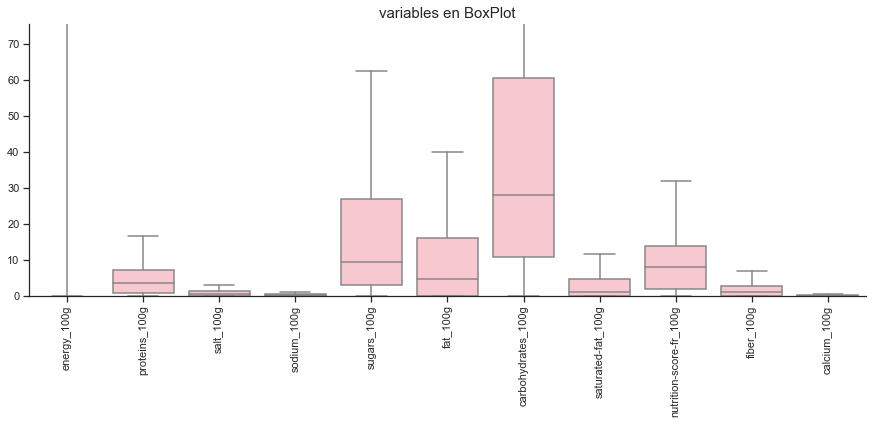

In [12]:
# https://www.statology.org/seaborn-boxplot-remove-outliers/
# boxplot de variables:
degrees = 90

plt.figure(figsize=(15,5))

ax=plt.axes()
plt.xticks(rotation = degrees)
ax.set_ylim([0, 0.755e2])
sns.boxplot(data=terra[var], color='pink', showfliers=False).set_title("variables en BoxPlot", fontsize=15)

plt.show()

In [13]:
# analyse multivariée:

<function matplotlib.pyplot.show(close=None, block=None)>

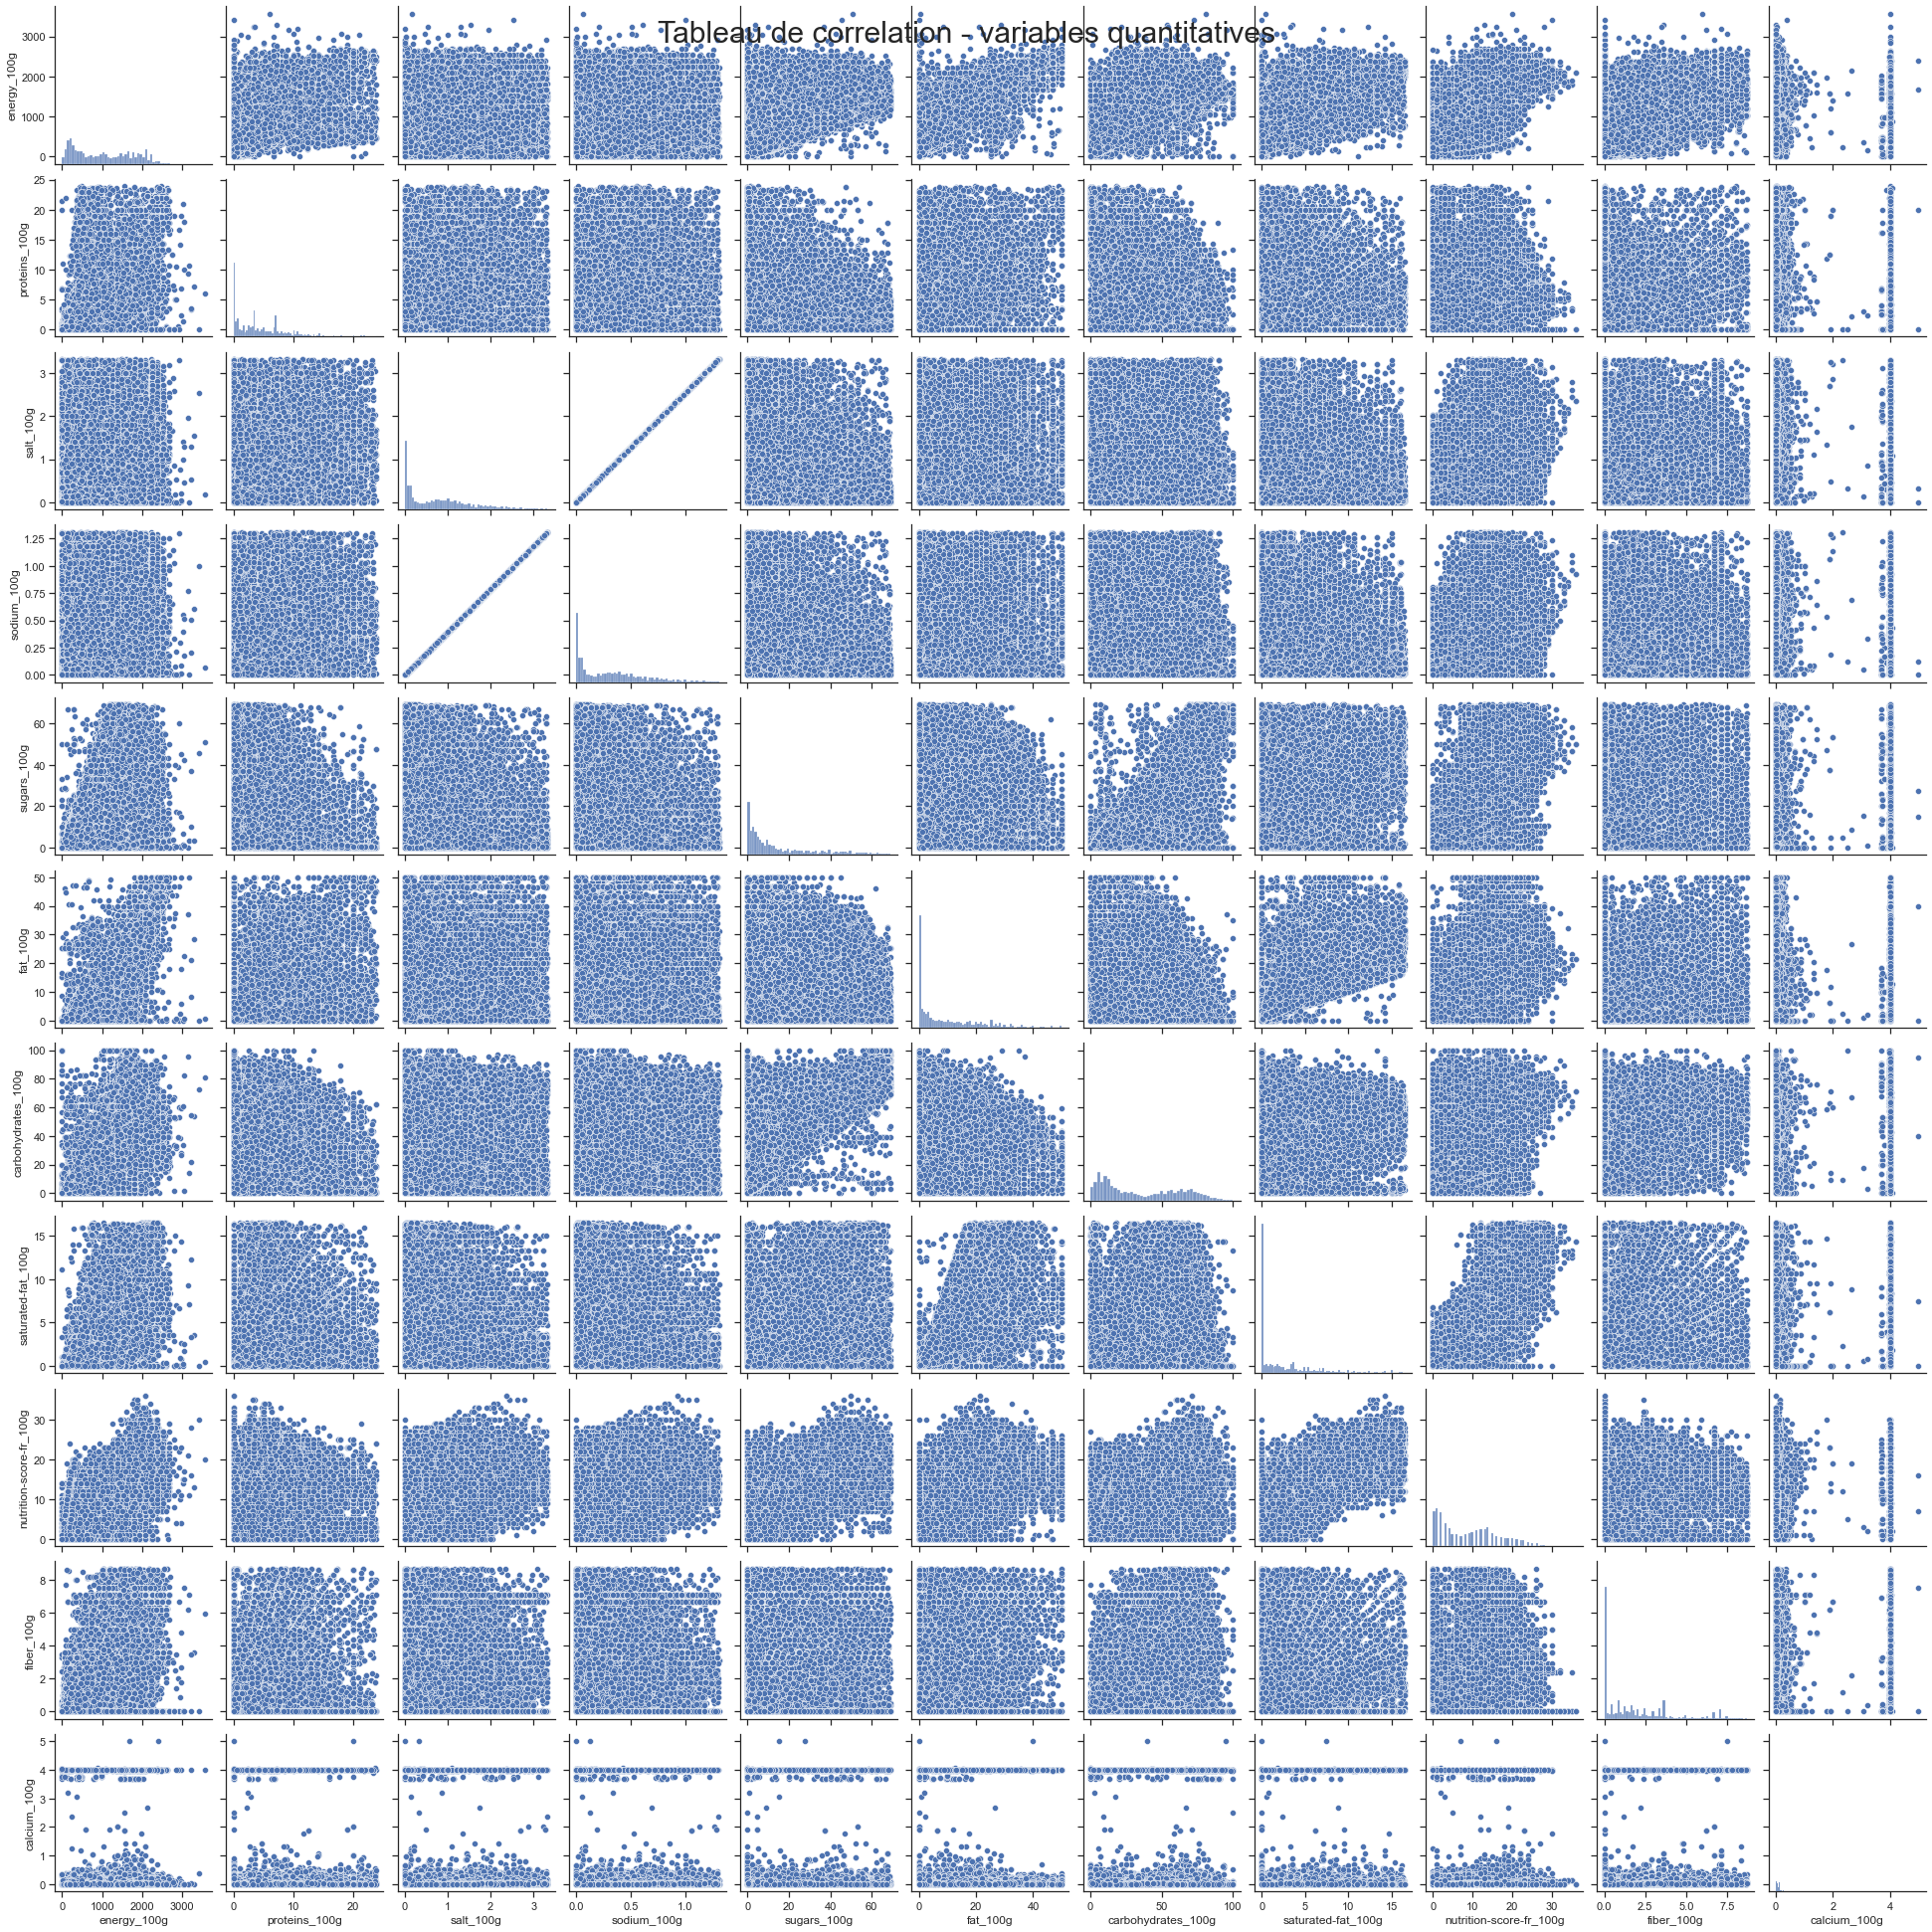

In [14]:
# https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22
# analyse bivariée:
ax = plt.axes
sns.set(style="ticks")
sns.pairplot(terra[vqnt])
plt.suptitle('Tableau de correlation - variables quantitatives', fontsize=30)

plt.show

In [15]:
# https://larevueia.fr/4-methodes-pour-gerer-les-donnees-manquantes-en-machine-learning-avec-pandas/

In [16]:
# création d'un subset du df de base sans vm:
# https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object
# https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names
# AttributeError: 'NoneType' object has no attribute 'corr'
# df_full.corr
# df.drop(columns =['C', 'D'])
df_full = terra.drop(['code', 'countries_fr', 'product_name', 'brands', 'nutrition_grade_fr',
       'pnns_groups_2', 'pnns_groups_1', 'categories_fr','countries_cleaned','countries_cleaned_cat'], axis=1)

In [17]:
df_full

energy_100g  proteins_100g  salt_100g  sodium_100g  sugars_100g  \
0           1637.0            7.6    0.38100     0.150000         55.3   
1           2320.0            8.1    0.35000     0.137795         47.0   
2            159.0            1.8    1.01600     0.400000          0.4   
3            184.0            0.6    0.00508     0.002000          9.2   
4            201.0            0.3    0.00762     0.003000         10.5   
...            ...            ...        ...          ...          ...   
74629        448.0           18.0    1.70000     0.669291          1.5   
74630       1109.0            2.3    0.17000     0.066929         20.0   
74631        243.0            0.5    0.00000     0.000000         11.0   
74632        387.0            3.0    0.15000     0.059055         11.1   
74633       1480.0            4.2    0.08000     0.031496         60.0   

       fat_100g  carbohydrates_100g  saturated-fat_100g  \
0           3.2                81.0                0.90   
1          35.5                48.5               15.00   
2           0.8                 5.5                0.30   
3           0.1                10.5                0.05   
4           0.1                12.4                0.02   
...         ...                 ...                 ...   
74629       3.0                 2.0                1.10   
74630      15.0                29.0               11.00   
74631       0.5                12.0                0.10   
74632       1.4                16.7                0.80   
74633       2.1                78.0                0.50   

       nutrition-score-fr_100g  fiber_100g  calcium_100g  
0                         13.0        1.50      4.012667  
1                         23.0        3.30      4.012667  
2                          3.0        0.70      4.012667  
3                          4.0        0.50      4.012667  
4                         14.0        0.50      3.986000  
...                        ...         ...           ...  
74629                      4.0        0.00      4.012667  
74630                     17.0        0.80      4.012667  
74631                      0.0        1.50      4.012667  
74632                      2.0        0.18      4.012667  
74633                     13.0        1.20      4.012667  

[74634 rows x 11 columns]

In [18]:
df_full.isna().sum()

energy_100g                0
proteins_100g              0
salt_100g                  0
sodium_100g                0
sugars_100g                0
fat_100g                   0
carbohydrates_100g         0
saturated-fat_100g         0
nutrition-score-fr_100g    0
fiber_100g                 0
calcium_100g               0
dtype: int64

In [19]:
# matrice de corrélation linéaire:
# https://datatofish.com/correlation-matrix-pandas/
df_full.corr()

energy_100g  proteins_100g  salt_100g  sodium_100g  \
energy_100g                 1.000000       0.466943   0.221794     0.221794   
proteins_100g               0.466943       1.000000   0.338719     0.338719   
salt_100g                   0.221794       0.338719   1.000000     1.000000   
sodium_100g                 0.221794       0.338719   1.000000     1.000000   
sugars_100g                 0.441756      -0.127400  -0.318157    -0.318157   
fat_100g                    0.759215       0.442596   0.262496     0.262495   
carbohydrates_100g          0.781163       0.189466   0.053411     0.053411   
saturated-fat_100g          0.610600       0.283176   0.035751     0.035750   
nutrition-score-fr_100g     0.718197       0.151758   0.242452     0.242451   
fiber_100g                  0.529791       0.401263   0.147438     0.147438   
calcium_100g               -0.149344      -0.041192  -0.165149    -0.165149   

                         sugars_100g  fat_100g  carbohydrates_100g  \
energy_100g                 0.441756  0.759215            0.781163   
proteins_100g              -0.127400  0.442596            0.189466   
salt_100g                  -0.318157  0.262496            0.053411   
sodium_100g                -0.318157  0.262495            0.053411   
sugars_100g                 1.000000  0.093420            0.639288   
fat_100g                    0.093420  1.000000            0.245880   
carbohydrates_100g          0.639288  0.245880            1.000000   
saturated-fat_100g          0.287498  0.702734            0.278570   
nutrition-score-fr_100g     0.604798  0.590456            0.564033   
fiber_100g                  0.118041  0.426466            0.391504   
calcium_100g               -0.029306 -0.112574           -0.138689   

                         saturated-fat_100g  nutrition-score-fr_100g  \
energy_100g                        0.610600                 0.718197   
proteins_100g                      0.283176                 0.151758   
salt_100g                          0.035751                 0.242452   
sodium_100g                        0.035750                 0.242451   
sugars_100g                        0.287498                 0.604798   
fat_100g                           0.702734                 0.590456   
carbohydrates_100g                 0.278570                 0.564033   
saturated-fat_100g                 1.000000                 0.713199   
nutrition-score-fr_100g            0.713199                 1.000000   
fiber_100g                         0.234896                 0.135306   
calcium_100g                      -0.049779                -0.071942   

                         fiber_100g  calcium_100g  
energy_100g                0.529791     -0.149344  
proteins_100g              0.401263     -0.041192  
salt_100g                  0.147438     -0.165149  
sodium_100g                0.147438     -0.165149  
sugars_100g                0.118041     -0.029306  
fat_100g                   0.426466     -0.112574  
carbohydrates_100g         0.391504     -0.138689  
saturated-fat_100g         0.234896     -0.049779  
nutrition-score-fr_100g    0.135306     -0.071942  
fiber_100g                 1.000000     -0.084415  
calcium_100g              -0.084415      1.000000

In [20]:
# https://www.statology.org/seaborn-heatmap-size/
# représentation graphique-heatmap:
#fig, ax = plt.subplots(figsize=(15, 5))

#sns.heatmap(df_full.corr(), annot=True)

#plt.show()

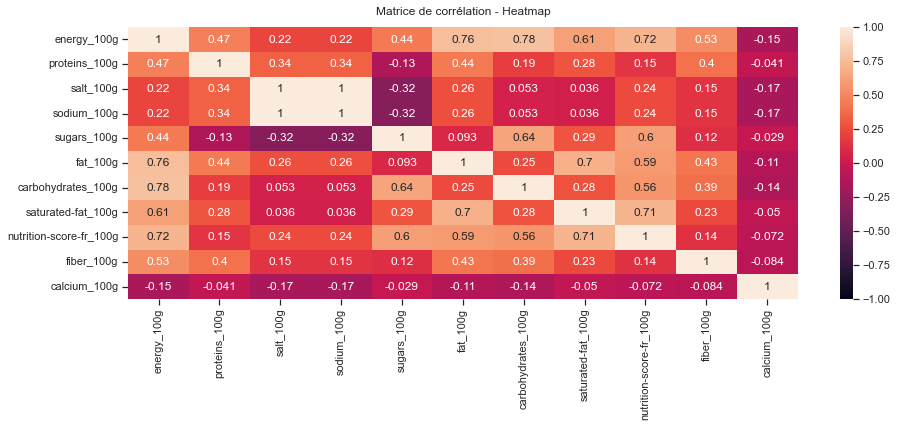

In [21]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# fig, ax=plt.subplots(figsize=(6,6))
# sns.heatmap(texa[vqnt].corr(), annot=False, square=True, linewidth=1, cmap="magma")
# plt.suptitle('matrice de correlation linéaire - heatmap des variables quantitatives', fontsize=15)

# plt.show()

# Increase the size of the heatmap
plt.figure(figsize=(15, 5))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(terra[vqnt].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Matrice de corrélation - Heatmap', fontdict={'fontsize':12}, pad=12);

In [22]:
# scatter plot de valeurs fortement corréllées: 'energy_100g' vs 'fat_100g'

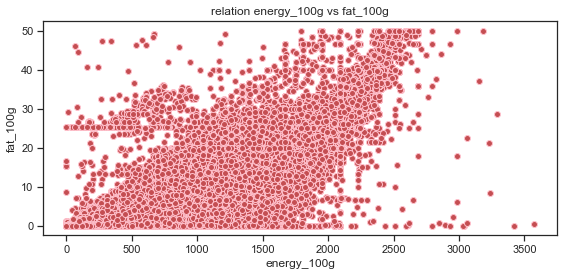

In [23]:
# plt.scatter(df_full['energy_100g'],
#          df_full['fat_100g'], color= 'green')

# https://www.cours-gratuit.com/tutoriel-python/tutoriel-python-comment-raliser-des-scatter-plot-avec-python#_Toc55677992
# https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/
'''

energy_100g = df_full['energy_100g']
fat_100g = df_full['fat_100g']
plt.scatter(energy_100g, fat_100g, s=10, alpha=0.2, edgecolor='pink', linewidth=0.5)
plt.title('relation energy100g vs fat100g')
plt.xlabel('energy_100g')
plt.ylabel('fat_100g')
plt.tight_layout()
plt.show() 
'''
# tips = sns.load_dataset("tips")
# sns.relplot(data=tips, x="total_bill", y="tip", cmap='spring')

# df_full.plot.scatter(x='energy_100g', y='fat_100g', title= "Scatter plot entre energy_100g et fat_100g", s=100, alpha=1,linewidth=2, edgecolor='g', c='b');
# plt.show()

# sns.scatterplot(data=df_full, x='energy_100g', y='fat_100g', s=100, alpha=1, edgecolor='g', linewidth=1)
# plt.show()

# ax = terra.plot.scatter(x="energy_100g", y="fat_100g", c='g')


fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df_full['energy_100g'], df_full['fat_100g'], color = "r", edgecolors = "pink")

plt.title('relation energy_100g vs fat_100g')
plt.xlabel("energy_100g")
plt.ylabel("fat_100g")

plt.tight_layout()
plt.show()

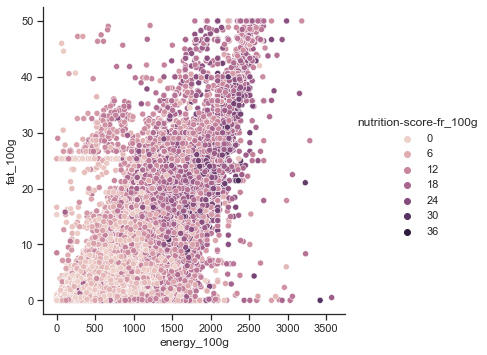

In [24]:
# https://realpython.com/visualizing-python-plt-scatter/
sns.pairplot(x_vars=['energy_100g'], y_vars=['fat_100g'], data=df_full, hue="nutrition-score-fr_100g", height=5)

7.334545692145476


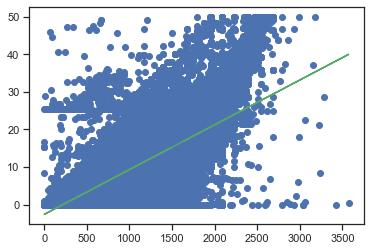

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df_full['energy_100g'][:, np.newaxis]
y = df_full['fat_100g'][:, np.newaxis]

model = LinearRegression()

model.fit(x,y)
y_predict = model.predict(x)

rmse_linear = np.sqrt(mean_squared_error(y,y_predict))
print(rmse_linear)

plt.scatter(x, y)
plt.plot(x, y_predict, color='g')
plt.show()

In [26]:
# remarques:

In [27]:
# recherche de regression:

In [28]:
X = terra.dropna().loc[:,'fat_100g'].values.reshape(-1, 1)
y = terra.dropna().loc[:,'nutrition-score-fr_100g'].values.reshape(-1, 1)

In [29]:
reg = LinearRegression().fit(X, y)

In [30]:
reg.coef_

array([[0.38556568]])

In [31]:
# https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination
# pour rappel: 𝑅²=1−∑𝑦𝑖−𝑓(𝑦𝑖)∑𝑦𝑖−𝑦

In [32]:
reg.score(X, y)

0.3486385666452694

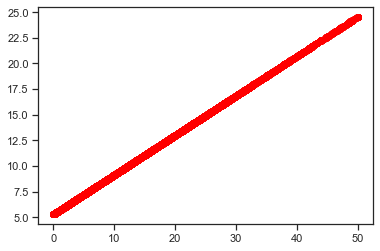

In [33]:
nutriscore_pred = reg.predict(X)
plt.scatter(terra.dropna()['fat_100g'], nutriscore_pred, color='red')

In [34]:
# sur plusieurs variables:
X = terra.dropna()[['fat_100g', 'energy_100g', 'sugars_100g', 'salt_100g']].to_numpy()
y = terra.dropna()['nutrition-score-fr_100g'].to_numpy().reshape(-1, 1)

In [35]:
reg = LinearRegression().fit(X, y)

In [36]:
reg.coef_

array([[2.64157119e-01, 5.12704736e-04, 2.64238037e-01, 3.17054212e+00]])

In [37]:
reg.score(X, y)

0.7487806529427796

In [38]:
# soit un score, plus élevé.

In [39]:
# ANOVA:
# https://www.geeksforgeeks.org/how-to-perform-a-two-way-anova-in-python/
# https://towardsdatascience.com/two-way-anova-test-with-python-a112e2396d78

# https://www.reneshbedre.com/blog/anova.html
# https://towardsdatascience.com/anova-test-with-python-cfbf4013328b


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [41]:
terra

code      countries_fr  \
0      3257980112590            France   
1      3045140118502  France,Allemagne   
2      7613031264285           Pologne   
3      3262720380092            France   
4      3262720380054            France   
...              ...               ...   
74629  8007141504376            France   
74630       20437336            France   
74631  3297760098379            France   
74632       24672481          Slovénie   
74633  3017760038409     France,Suisse   

                                            product_name            brands  \
0                                               Boudoirs              Cora   
1                                     Noisettes Entières             Milka   
2                                  SMACZNA ZUPA Grochova    WINIARY,Nestlé   
3                             Jus d'orange des tropiques             Royal   
4                                        Nectar Tropical             Royal   
...                                                  ...               ...   
74629               Rovagnati Prosciutto Cotto Snello GR            Snello   
74630                                      Dessert Mango            Deluxe   
74631  Spécialité de pommes abricots Bergeron sans su...  Charles Et Alice   
74632                     Pudding z okusom gozdni sadeži             Bella   
74633                         Lulu la barquette (Fraise)                LU   

      nutrition_grade_fr       pnns_groups_2  pnns_groups_1  \
0                      d  biscuits and cakes  sugary snacks   
1                      e  chocolate products  sugary snacks   
2                      c             unknown        unknown   
3                      c        fruit juices      beverages   
4                      e       fruit nectars      beverages   
...                  ...                 ...            ...   
74629                  c             unknown        unknown   
74630                  d             unknown        unknown   
74631                  b             unknown        unknown   
74632                  b             unknown        unknown   
74633                  d  biscuits and cakes  sugary snacks   

                                           categories_fr  energy_100g  \
0      Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...       1637.0   
1      Snacks sucrés,Chocolats,Chocolats au lait,Choc...       2320.0   
2                                 pl:Soupes-deshydratees        159.0   
3      Aliments et boissons à base de végétaux,Boisso...        184.0   
4      Aliments et boissons à base de végétaux,Boisso...        201.0   
...                                                  ...          ...   
74629                                            unknown        448.0   
74630                                            unknown       1109.0   
74631                                            unknown        243.0   
74632                                  Desserts,Puddings        387.0   
74633  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...       1480.0   

       proteins_100g  ...  sodium_100g  sugars_100g  fat_100g  \
0                7.6  ...     0.150000         55.3       3.2   
1                8.1  ...     0.137795         47.0      35.5   
2                1.8  ...     0.400000          0.4       0.8   
3                0.6  ...     0.002000          9.2       0.1   
4                0.3  ...     0.003000         10.5       0.1   
...              ...  ...          ...          ...       ...   
74629           18.0  ...     0.669291          1.5       3.0   
74630            2.3  ...     0.066929         20.0      15.0   
74631            0.5  ...     0.000000         11.0       0.5   
74632            3.0  ...     0.059055         11.1       1.4   
74633            4.2  ...     0.031496         60.0       2.1   

       carbohydrates_100g  saturated-fat_100g  nutrition-score-fr_100g  \
0                    81.0                0.90                     13.0   
1          

In [42]:
# https://stackoverflow.com/questions/57948003/how-to-increase-jupyter-notebook-memory-limit
# https://stats.stackexchange.com/questions/516949/what-does-it-mean-when-a-data-matrix-has-full-rank

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('energy_100g ~ C(countries_fr) + C(nutrition_grade_fr) + C(countries_fr):C(nutrition_grade_fr)', terra).fit()
result_anova = sm.stats.anova_lm(model, typ=2)
result_anova


C:\Users\Utilisateur\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 240, but rank is 98
  warnings.warn('covariance of constraints does not have full '
C:\Users\Utilisateur\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\Utilisateur\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 960, but rank is 7
  warnings.warn('covariance of constraints does not have full '


sum_sq       df           F  \
C(countries_fr)                        7.188961e+09    240.0  108.432044   
C(nutrition_grade_fr)                 -3.625061e+01      4.0   -0.000033   
C(countries_fr):C(nutrition_grade_fr)  3.787880e+08    960.0    1.428327   
Residual                               2.049447e+10  74189.0         NaN   

                                         PR(>F)  
C(countries_fr)                        0.000000  
C(nutrition_grade_fr)                  1.000000  
C(countries_fr):C(nutrition_grade_fr)  0.188689  
Residual                                    NaN

In [43]:
# Interprétation:

In [44]:
sample_df = terra[['countries_fr', 'nutrition_grade_fr', 'energy_100g']]

In [45]:
sample_df

countries_fr nutrition_grade_fr  energy_100g
0                France                  d       1637.0
1      France,Allemagne                  e       2320.0
2               Pologne                  c        159.0
3                France                  c        184.0
4                France                  e        201.0
...                 ...                ...          ...
74629            France                  c        448.0
74630            France                  d       1109.0
74631            France                  b        243.0
74632          Slovénie                  b        387.0
74633     France,Suisse                  d       1480.0

[74634 rows x 3 columns]

In [46]:

# représentation graphique:
#from statsmodels.graphics.factorplots import interaction_plot
#from cycler import cycler

#fig, ax = plt.subplots(figsize=(20, 6))
#fig = interaction_plot(
#    x=sample_df['countries_fr'],
#    trace=sample_df['nutrition_grade_fr'],
#    response=sample_df['energy_100g'],
#    colors=["red", "blue"],
#    markers=["D", "^", "o"],
#    ms=10,
#    ax=ax,
#)


In [47]:
# éboulis de valeurs propres:
# https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
# https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
# 3 méthodes: a.) scree plot, b.) règle de Kaiser, c.) % de variation du seuil
# https://statisticsglobe.com/choose-optimal-number-components-pca
# critère de Kaiser:
# https://en.wikipedia.org/wiki/Scree_plot
# https://en.wikipedia.org/wiki/Elbow_method_(clustering)
# https://en.wikipedia.org/wiki/Analysis_of_variance

# construire le cercle des corrélations
# analyser la projection des individus
# établir la contribution des individus
# ébouli de valeurs propres - sélection du nb optimal de composantes à conserver:


In [48]:
# https://statisticallyrelevant.com/principal-component-analysis-in-python/

In [49]:
# attention: 3 impératifs dans la perspective d'une ACP:

#    1- aucune valeur (Null) ou manquante ne doit subsister, dans le dataset
#    2- toutes les variables doivent être de type numérique
#    3- normer les variables -afin d'obtenir pour chacune: moyenne=0 et écart-type=1


In [50]:
# éliminer les colonnes qui ne répondent pas aux critères:

texa = terra.drop(columns = ['code', 'countries_fr', 'product_name', 'brands', 'nutrition_grade_fr',
       'pnns_groups_2', 'pnns_groups_1', 'categories_fr', 'countries_cleaned','countries_cleaned_cat'])


In [51]:
texa

energy_100g  proteins_100g  salt_100g  sodium_100g  sugars_100g  \
0           1637.0            7.6    0.38100     0.150000         55.3   
1           2320.0            8.1    0.35000     0.137795         47.0   
2            159.0            1.8    1.01600     0.400000          0.4   
3            184.0            0.6    0.00508     0.002000          9.2   
4            201.0            0.3    0.00762     0.003000         10.5   
...            ...            ...        ...          ...          ...   
74629        448.0           18.0    1.70000     0.669291          1.5   
74630       1109.0            2.3    0.17000     0.066929         20.0   
74631        243.0            0.5    0.00000     0.000000         11.0   
74632        387.0            3.0    0.15000     0.059055         11.1   
74633       1480.0            4.2    0.08000     0.031496         60.0   

       fat_100g  carbohydrates_100g  saturated-fat_100g  \
0           3.2                81.0                0.90   
1          35.5                48.5               15.00   
2           0.8                 5.5                0.30   
3           0.1                10.5                0.05   
4           0.1                12.4                0.02   
...         ...                 ...                 ...   
74629       3.0                 2.0                1.10   
74630      15.0                29.0               11.00   
74631       0.5                12.0                0.10   
74632       1.4                16.7                0.80   
74633       2.1                78.0                0.50   

       nutrition-score-fr_100g  fiber_100g  calcium_100g  
0                         13.0        1.50      4.012667  
1                         23.0        3.30      4.012667  
2                          3.0        0.70      4.012667  
3                          4.0        0.50      4.012667  
4                         14.0        0.50      3.986000  
...                        ...         ...           ...  
74629                      4.0        0.00      4.012667  
74630                     17.0        0.80      4.012667  
74631                      0.0        1.50      4.012667  
74632                      2.0        0.18      4.012667  
74633                     13.0        1.20      4.012667  

[74634 rows x 11 columns]

In [52]:
tvm(texa)

0.0

In [53]:
# normer les variables:
scaler = StandardScaler()
pca_std = scaler.fit_transform(texa)

In [54]:
# appliquer l'ACP:

In [55]:
# Fit PCA:

# instancier la PCA() dans une variable -appelée ici- pca:
pca = PCA()

# utiliser fit_transform() sur la donnée et la stocker dans une variable -fit_pca:
fit_pca = pca.fit_transform(pca_std)


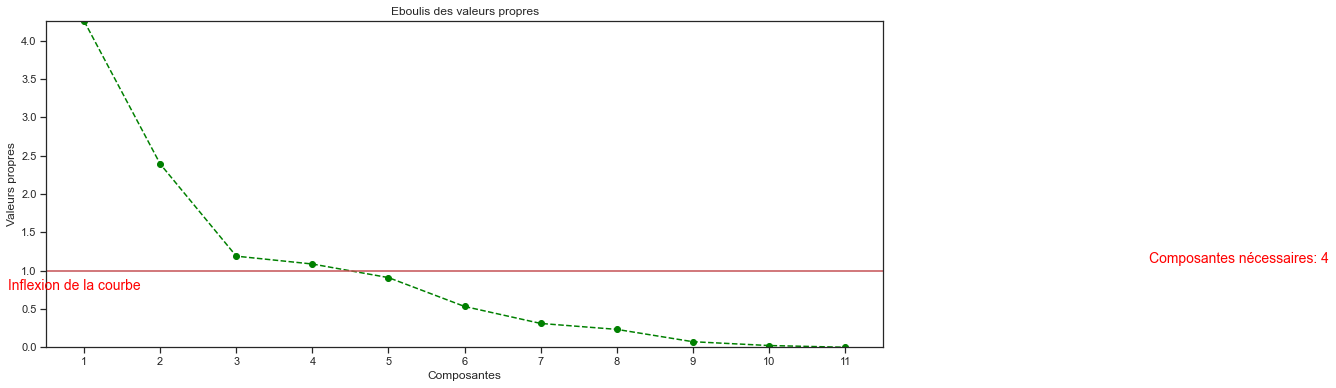

In [56]:
# scree plot:
# https://www.psychometrie.jlroulin.fr/cours/aide_quizz.html?H35.html
# # https://www.statology.org/scree-plot-python/

plt.figure(figsize=(15, 6))

components = np.arange(1, 12, step=1)
eigenvalues = pca.explained_variance_

plt.plot(components, eigenvalues, marker = 'o', linestyle = '--', color = 'green')

plt.ylim(0, max(eigenvalues))

plt.ylabel('Valeurs propres')
plt.xlabel('Composantes')

plt.xticks(np.arange(1, 12, step = 1))
plt.title('Eboulis des valeurs propres')

plt.axhline(y=1, color = 'r', linestyle = '-')

plt.text(0, 0.75, "Inflexion de la courbe", color = 'red', fontsize=14)
plt.text(15, 1.10, 'Composantes nécessaires: '+str(np.where(eigenvalues<=1)[0][0]), 
                 color = 'red', fontsize=14)
plt.show()


In [57]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    
    plt.bar(np.arange(len(scree))+1, scree)
    
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c ="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    
    plt.title("Eboulis des valeurs propres")
    
    plt.show(block=False)

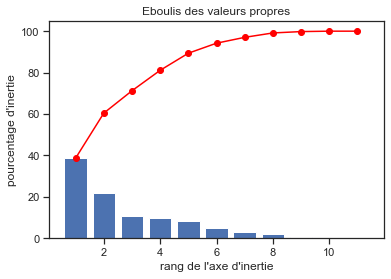

In [58]:
display_scree_plot(pca)

In [59]:
# variance cumulée:

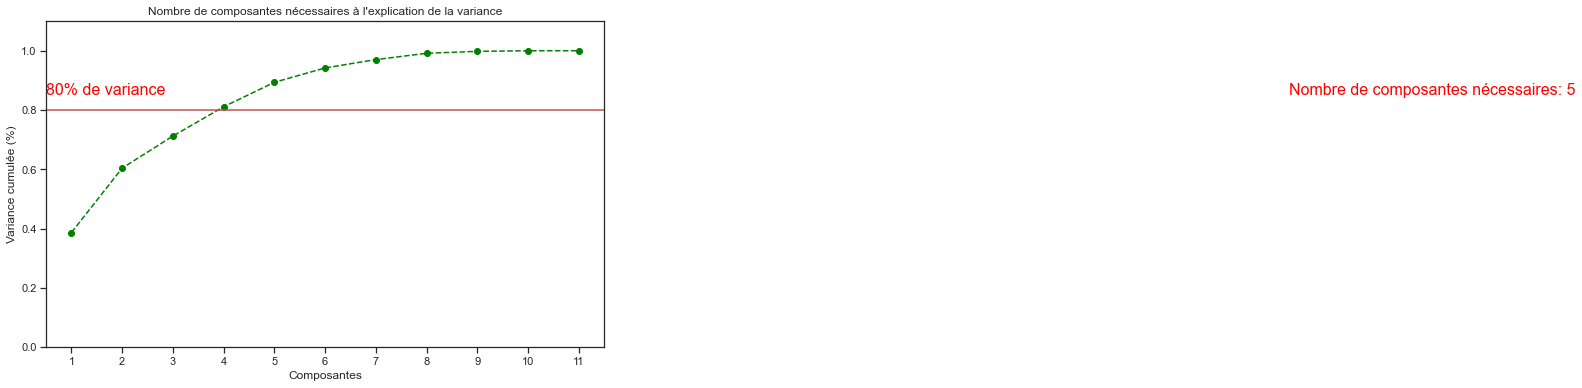

In [60]:
# variance cumulée pour chaque composante:
plt.figure(figsize = (10, 6))

components = np.arange(1, 12, step=1)
variance = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')

plt.xlabel('Composantes')
plt.xticks(np.arange(1, 12, step=1))

plt.ylabel('Variance cumulée (%)')
plt.title("Nombre de composantes nécessaires à l'explication de la variance")

plt.axhline(y=0.80, color='r', linestyle='-')

plt.text(0.5, 0.85, '80% de variance', color = 'red', fontsize=16)
plt.text(25, 0.85, "Nombre de composantes nécessaires: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), color = "red", fontsize=16)

plt.show()


In [61]:
# processus d'implémentation d'une ACP via Scikit-Learn

In [62]:
# prélablement, charger les librairies nécessaires

In [63]:
# 1 - charger ensuite les données:
# https://builtin.com/machine-learning/pca-in-python
# https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
# # Principal Component Analysis · ‎Importing Dataset · ‎Preprocessing · ‎Applying PCA

In [64]:
# 2 - normer les composantes-utiliser StandardScaler:
# the data set’s features onto unit scale (moyenne de chaque variable= 0 et variance = 1)

In [65]:
# 3 - projection ACP en 2D/3D - ici, le code projette les données en 2D/3D
# après réduction de dimension.

In [66]:
# 4 - visualisation de la projection en 2D/3D:

In [67]:
# 5 - variance expliquée: explained_variance_ratio_

In [68]:
# https://nirpyresearch.com/pca-correlation-circle/
# The PCA correlation circle:
# 1. standardize the data
# 2. calculate the covariance matrix
# 3. find the eigenvalues and eigenvectors - covariance matrix.
# 4. sort eigenvalues
# 5. transform the original matrix

In [69]:
# https://stackoverflow.com/questions/37815987/plot-a-correlation-circle-in-python

In [70]:
# https://spss.espaceweb.usherbrooke.ca/analyse-en-composantes-principales-2/
# https://fermin.perso.math.cnrs.fr/Files/ACP-AFM.html
# https://cedric.cnam.fr/vertigo/Cours/ml/tpAcp.html
# https://www.lovelyanalytics.com/2021/07/29/acp-analyse-en-composantes-principales/

In [71]:
# séparation des variables:
terra.replace([np.inf, -np.inf], 0, inplace=True)
x = terra[vqnt].values

In [72]:
# https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d


In [73]:
# variable cible ('nutrition-score-fr_100g'):

y = terra['nutrition-score-fr_100g'].values
hue = pd.DataFrame(y)

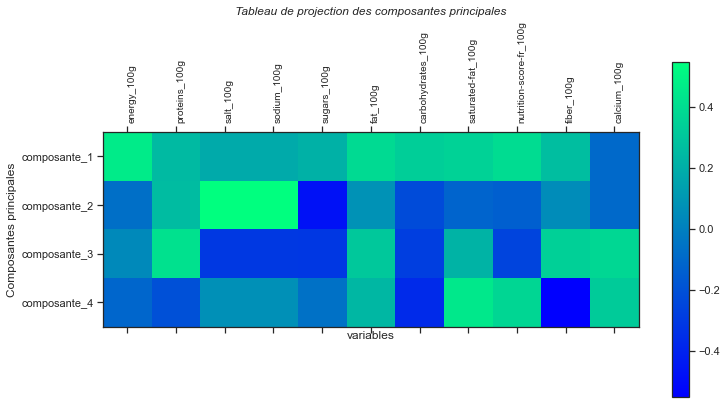

In [74]:
# 3. normalisation des données:

# scaler = StandardScaler()
# pca_std = scaler.fit_transform(texa)

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

# https://www.educative.io/answers/what-is-the-numpynantonum-function
X_scaled = np.nan_to_num(X_scaled, copy=False, nan=0.0, posinf=0.0, neginf=0.0)


pca = PCA(n_components=4)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

plt.figure(figsize=(12,6))

plt.matshow(pca.components_, fignum=1, cmap=('winter'));
plt.yticks([0,1,2,3], ['composante_1', 'composante_2', 'composante_3', 'composante_4']);
plt.colorbar();
plt.xticks(range(len(vqnt)), vqnt, rotation=90, fontsize=10, ha='left');

plt.xlabel('variables', fontsize=12);
plt.ylabel('Composantes principales', fontsize=12);
plt.title('Tableau de projection des composantes principales', fontsize=12, fontstyle='italic')

plt.show()



In [75]:
# Observations:

In [76]:
# 1ère composante: 'energy_100g', 'fat_100g','saturated_fat_100g'

In [77]:
# 2nd composante: 'salt_100g', 'sodium_100g'

In [78]:
# 3ème composante: 'proteins_100g'

In [79]:
# 4ème composante: 'saturated_fat_100g', 'nutritio-score-fr_100g'

In [80]:
# variance: écart carré moyen entre chaque donnée et le centre de la distribution représenté par la moyenne.

# variable expliquée: permet de tenir compte de la dispersion de toutes les valeurs d'un ensemble de données.

# (%) de variance expliquée = somme des pourcentages de variance expliquée, par les axes de la représentation
# indique, la part de l'information restituée par l'ACP.
# tendre vers les 100%, c'est faire, une excellente analyse!!
# on cherche une représentation restituant au - 50% de la variance i.e au - 50% de l'information totale.
# pour quantifier le (%) d'information gardé/perdu par réduction de dimension.

In [81]:

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig =px.bar(x=range(1, exp_var_cumul.shape[0] + 1), y=exp_var_cumul, labels={"x":"# Composante", "y":"Variance expliquée"})
fig.show()


In [82]:
# somme cumulée de la variance expliquée:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.area(x=range(1, exp_var_cumul.shape[0] + 1), y=exp_var_cumul, labels={"x":"#Composante", "y":"Variance expliquée"})
fig.show()


In [83]:
# valeurs propres - pca.eigenvals:

exp_var_pca=pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)


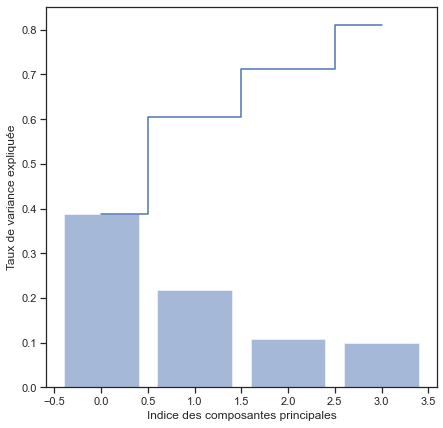

In [84]:
# visualisation en mode plot:

fig = plt.figure(figsize=(7,7))
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Taux de variance expliquée')
plt.xlabel('Indice des composantes principales')
plt.show()


In [85]:
# https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

In [86]:
from sklearn import decomposition
from sklearn import preprocessing

# Import `PCA` from `sklearn.decomposition:
from sklearn.decomposition import PCA

# choix du nombre de composantes à calculer:
n_comp = 4

# création du modèle:
pca = PCA(n_components=n_comp)

# import de l'échantillon:
data = texa


In [87]:
X = texa.values

# features = data.columns
features = texa.columns

# centrage et réduction:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# calcul des composantes principales:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

In [88]:
# cercle des corrélations:
# https://stackoverflow.com/questions/36380183/sklearn-pca-is-pca-components-the-loadings    
pcs = pca.components_

In [89]:
# affichage de cercle sur chaque plan factoriel:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
  
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # initialisation du graphique matplotlib:
            fig, ax = plt.subplots(figsize=(8,8))

            # délimitation des représentations graphiques:
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # fléchage sans pointe, à plus de 30 flèches:
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage du nom des variables:
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage d'un cercle:
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # délimitation des représentations graphiques:
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage d'une grille:
            plt.plot([-1, 1], [0, 0], color='r', ls='--')
            plt.plot([0, 0], [-1, 1], color='r', ls='--')

            # étiquettage des axes en % de la variance expliquée:
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle de correlation (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

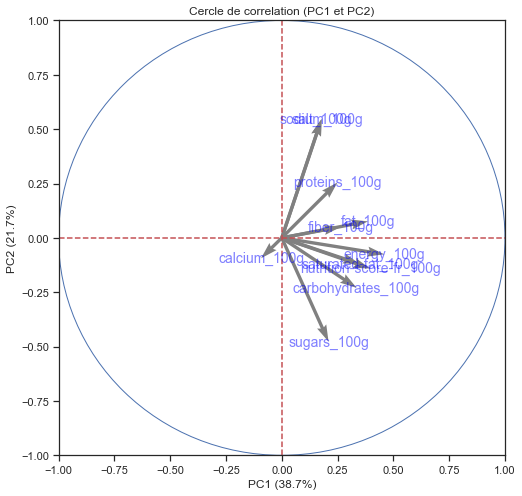

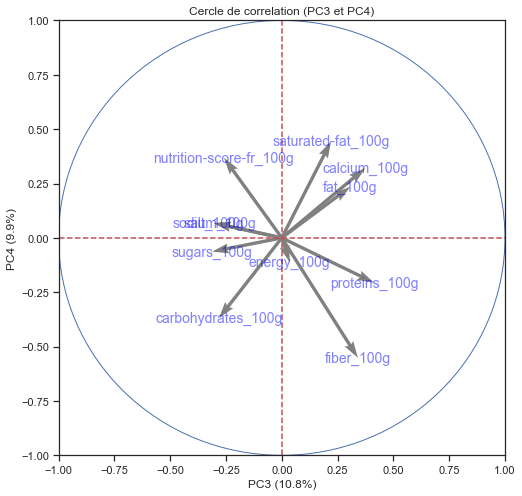

In [90]:

# plt.figure(figsize=(16,9))
plt.rcParams["figure.figsize"] = [16,9]
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))



In [91]:
# projection des individus:
X_projected = pca.transform(X_scaled)

In [92]:
# https://fr.wikipedia.org/wiki/Plan_factoriel
# définiton d'une fonction d'affichage de scatter plot sur chacun des plans factoriels:

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
  
    # pour chaque plan factoriel:
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure matplotlib:     
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points:
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels:
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # délimitation des représentations graphiques:
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage d'une grille:
            plt.plot([-100, 100], [0, 0], color='b', ls='--')
            plt.plot([0, 0], [-100, 100], color='b', ls='--')

            # étiquettage des axes en % de la variance expliquée:
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection de points (sur PC{} et PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

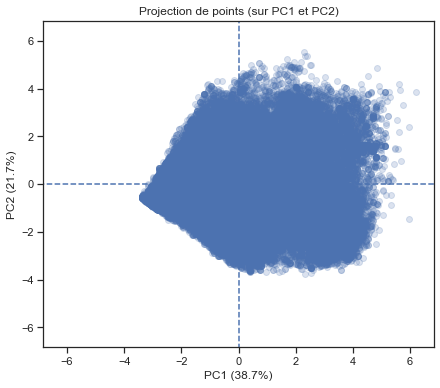

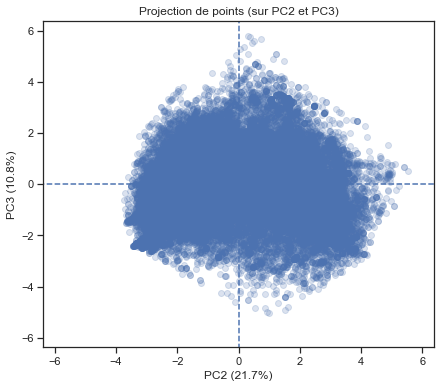

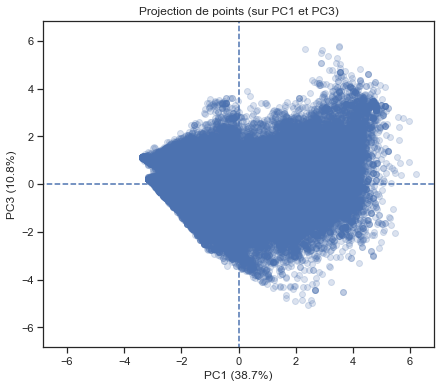

In [93]:
# affichage des plans factoriels:
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)

plt.show()


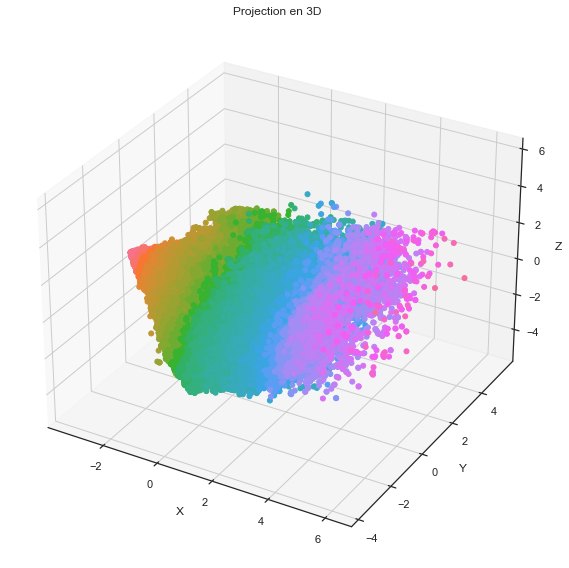

In [94]:
# tracé en 3D:
# https://nbhosting.inria.fr/builds/ue12-p22-python-numerique/handouts/latest/4-01-matplotlib-z1-inline.html

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(projection='3d')

# histogrammes:
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

# choix de couleur, par barre:
cmap = ListedColormap(sns.color_palette("husl", 32).as_hex())
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, s=25, c=x, marker='o', cmap=cmap, alpha=1)

plt.title("Projection en 3D")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

